<a href="https://colab.research.google.com/github/summerolmstead/GlobalClustering/blob/main/Global_Data_Clustering_Major_and_Summer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a project where we get global data and analyze it by using clustering algorithms. By Summer and Major

First- Attain data, clean, put into one big df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Big 2021 df with all of the data features are diff variables we have and constant will be countries (rows) when we make this

In [ ]:
import pandas as pd

#function to clean and filter a DataFrame for a specific year, we are going to use 2020
def clean_and_filter(df, year):
    columns_to_keep = ['Country Name'] + list(map(str, range(1960, 2023)))
    df = df[columns_to_keep]
    df.set_index('Country Name', inplace=True)

    df_year = df[[year]].copy()
    return df_year

population_df = pd.read_csv('/content/drive/MyDrive/GlobalData/populationtotal.csv', skiprows=4)
gdp_df = pd.read_csv('/content/drive/MyDrive/GlobalData/gdp.csv', skiprows=4)
national_income_df = pd.read_csv('/content/drive/MyDrive/GlobalData/nationalincome.csv', skiprows=4)
labor_force_df = pd.read_csv('/content/drive/MyDrive/GlobalData/laborforce.csv', skiprows=4)
nm_df = pd.read_csv('/content/drive/MyDrive/GlobalData/netmigration.csv', skiprows=4)
cab_df = pd.read_csv('/content/drive/MyDrive/GlobalData/currentaccbal.csv', skiprows=4)
mr_df = pd.read_csv('/content/drive/MyDrive/GlobalData/mortalityrate.csv', skiprows=4)

print(population_df.head())
#clean and filter each df for a specific year
year_to_filter = '2021'
pop_data_2020 = clean_and_filter(population_df, year_to_filter)
gdp_data_2020 = clean_and_filter(gdp_df, year_to_filter)
national_income_data_2020 = clean_and_filter(national_income_df, year_to_filter)
labor_force_data_2020 = clean_and_filter(labor_force_df, year_to_filter)
nm_data_2020 = clean_and_filter(nm_df, year_to_filter)
cab_data_2020 = clean_and_filter(cab_df, year_to_filter)
mr_data_2020 = clean_and_filter(mr_df, year_to_filter)

#merging to one big data frame
merged_df = (
    gdp_data_2020
    .merge(pop_data_2020, on='Country Name', how='inner')
    .merge(national_income_data_2020, on='Country Name', how='inner')
    .merge(labor_force_data_2020, on='Country Name', how='inner')
    .merge(nm_data_2020, on='Country Name', how='inner')
    .merge(cab_data_2020, on='Country Name', how='inner')
    .merge(mr_data_2020, on='Country Name', how='inner')
)

# reset the index!!
merged_df.reset_index(inplace=True)

# merge cleaned DataFrames with custom col names to get rid of default col names
merged_df = gdp_data_2020.merge(pop_data_2020, on='Country Name', how='inner')
merged_df = merged_df.rename(columns={'2021_x': 'GDP', '2021_y': 'Population Total'})

merged_df = merged_df.merge(national_income_data_2020, on='Country Name', how='inner')
merged_df = merged_df.rename(columns={'2021': 'National Income'})

merged_df = merged_df.merge(labor_force_data_2020, on='Country Name', how='inner')
merged_df = merged_df.rename(columns={'2021': 'Labor Force'})

merged_df = merged_df.merge(nm_data_2020, on='Country Name', how='inner')
merged_df = merged_df.rename(columns={'2021': 'Net Migration'})

merged_df = merged_df.merge(cab_data_2020, on='Country Name', how='inner')
merged_df = merged_df.rename(columns={'2021': 'Current Account Balance'})

merged_df = merged_df.merge(mr_data_2020, on='Country Name', how='inner')
merged_df = merged_df.rename(columns={'2021': 'Mortality Rate'})

#display the merged DataFrame
pd.set_option('display.float_format', lambda x: '%.3f' % x)  #avoid scientific notation output

pd.set_option('display.max_rows', None)  #all rows
pd.set_option('display.max_columns', None)  #all columns
pd.set_option('display.width', None) #unlimited width

#print(merged_df.to_string(line_width=200))
print(merged_df.head())

                  Country Name Country Code     Indicator Name Indicator Code          1960  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL     54608.000   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL 130692579.000   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   8622466.000   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL  97256290.000   
4                       Angola          AGO  Population, total    SP.POP.TOTL   5357195.000   

           1961          1962          1963          1964          1965          1966  \
0     55811.000     56682.000     57475.000     58178.000     58782.000     59291.000   
1 134169237.000 137835590.000 141630546.000 145605995.000 149742351.000 153955516.000   
2   8790140.000   8969047.000   9157465.000   9355514.000   9565147.000   9783147.000   
3  99314028.000 101445032.000 103667517.000 105959979.000 108336203.000 1

<ipython-input-79-7ccebb3e874a>:33: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2021_x'} in the result is deprecated and will raise a MergeError in a future version.
  gdp_data_2020
<ipython-input-79-7ccebb3e874a>:33: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2021_x'} in the result is deprecated and will raise a MergeError in a future version.
  gdp_data_2020


In [ ]:
global_data_df = merged_df.copy() #we will make a clean copy now

print(global_data_df.head())

                                          GDP  Population Total  National Income   Labor Force  \
Country Name                                                                                     
Aruba                          3103184101.514        106537.000        24994.773           NaN   
Africa Eastern and Southern 1086530704900.500     702977106.000         1232.352 285907674.000   
Afghanistan                   14266499429.875      40099462.000          339.682   9356574.000   
Africa Western and Central   844927536437.833     478185907.000         1415.983 166806489.000   
Angola                        66505129989.243      34503774.000         1232.948  14445598.000   

                             Net Migration  Current Account Balance  Mortality Rate  
Country Name                                                                         
Aruba                              501.000             79257066.708             NaN  
Africa Eastern and Southern    -179444.000             

NaN Value Cleanup

In [ ]:
nan_percentage = global_data_df.isnull().mean(axis=1) * 100
#percentage of NaN values for each row
threshold = 0 # we get rid of all nan rows

#filter out rows with NaN values exceeding the threshold %
rows_with_high_nan = global_data_df[nan_percentage > threshold]

#this line of code will get rid of the rows with the high nan based on threshold
cleaned_df = merged_df.dropna(thresh=len(merged_df.columns) - (threshold / 100 * len(merged_df.columns)))
#then could print cleanded_df to see new result
#print(cleaned_df)
#rows with high NaN values we get rid of
print(rows_with_high_nan)

                                                                  GDP  Population Total  \
Country Name                                                                              
Aruba                                                  3103184101.514        106537.000   
Africa Eastern and Southern                         1086530704900.500     702977106.000   
Afghanistan                                           14266499429.875      40099462.000   
Africa Western and Central                           844927536437.833     478185907.000   
Andorra                                                3325143693.287         79034.000   
Arab World                                          2930480380718.330     456520777.000   
United Arab Emirates                                 415178792769.884       9365145.000   
American Samoa                                          750000000.000         45035.000   
Antigua and Barbuda                                    1601366666.667         93219.000   

In [ ]:
#print(cleaned_df) #our new cleaned data frame to work with
print(cleaned_df.to_string(line_width=220))

                                              GDP  Population Total  National Income   Labor Force  Net Migration  Current Account Balance  Mortality Rate
Country Name                                                                                                                                              
Angola                            66505129989.243      34503774.000         1232.948  14445598.000      29089.000           8399451648.833          47.200
Albania                           17930565118.818       2811666.000         5262.914   1382433.000     -10612.000          -1369694859.413           8.400
Argentina                        487902572164.348      45808747.000         8993.547  21191985.000       2344.000           6644503789.249           6.100
Armenia                           13878908628.938       2790974.000         4023.251   1393091.000     -12825.000           -482982405.936           9.500
Australia                       1559033756285.130      25685412.000   

In [ ]:
cleaned_df.to_csv('cleanedproj.csv', index=True) #seeing cleaned file to save if needed

Now we have cleaned and got the data ready for analysis!
Lets first look over some stats for it

In [ ]:
cleaned_df.describe()

,GDP,Population Total,National Income,Labor Force,Net Migration,Current Account Balance,Mortality Rate
count,150.000,150.000,150.000,150.000,150.000,150.000,150.000
mean,691919255478.329,50076091.673,12525.067,22674070.987,11224.513,6978056336.403,18.415
std,2717377562571.492,169031916.838,17048.941,80160733.954,113776.878,89914727960.383,17.734
min,469228219.666,104332.000,338.936,36740.000,-471395.000,-831453000000.000,1.600
25%,14580462119.165,2793440.250,1861.035,1383781.000,-11092.750,-2958709810.503,4.525
50%,58370375516.243,10043593.500,4728.770,4506523.000,-915.000,-512091891.566,12.000
75%,318029149094.945,33680071.750,14747.433,13760597.500,10206.750,2027044421.422,27.525
max,23315080560000.000,1412360000.000,77781.176,780370660.000,819231.000,414807967171.572,78.300


In [ ]:
cleaned_df.shape

(150, 7)

K-Means, Summer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

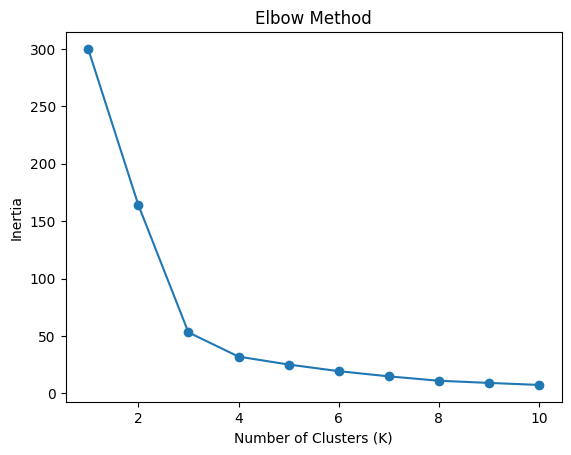

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


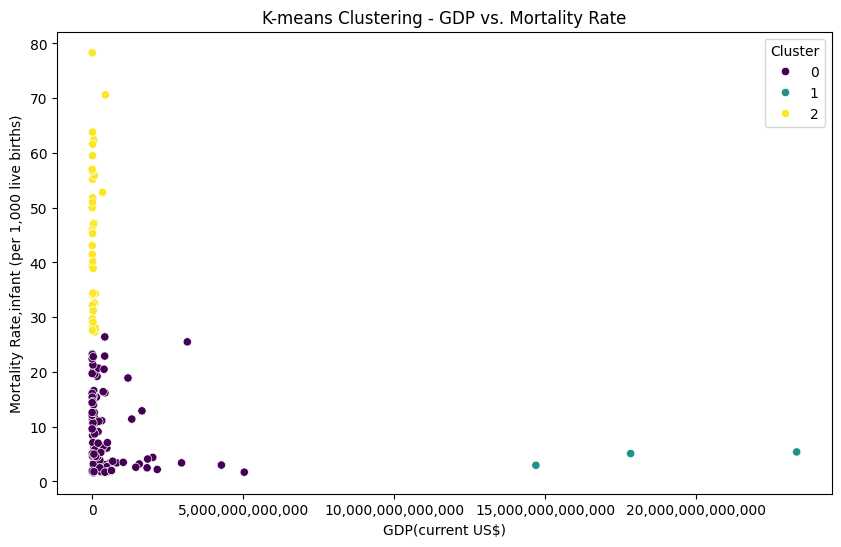

In [ ]:
#GDP VS MORTALITY, K MEANS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#'cleaned_df' is original df
#subset df with specific features
selected_features = ['GDP', 'Mortality Rate']
 #from cleaned df columns
gdp_vs_mr_df = cleaned_df[selected_features].copy()

#copy to not alter the original data
gdp_vs_mr_df_scaled = gdp_vs_mr_df.copy()

#scale features between these two features
scaler = StandardScaler()
gdp_vs_mr_df_scaled = scaler.fit_transform(gdp_vs_mr_df_scaled)

#elbow Method to find the optimal K
inertia = []
for k in range(1, 11):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(gdp_vs_mr_df_scaled)
      inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
gdp_vs_mr_df['Cluster'] = kmeans.fit_predict(gdp_vs_mr_df_scaled)

#visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Mortality Rate', hue='Cluster', data=gdp_vs_mr_df, palette='viridis')

#setting the x-axis tick label format to show real values without scientific notation
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('K-means Clustering - GDP vs. Mortality Rate')
plt.xlabel('GDP(current US$)')
plt.ylabel('Mortality Rate,infant (per 1,000 live births)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

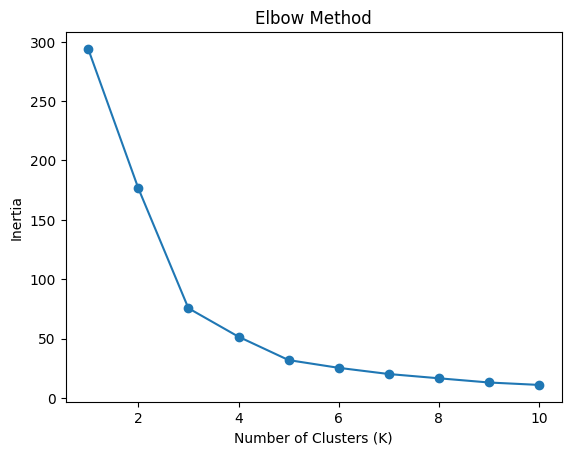

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


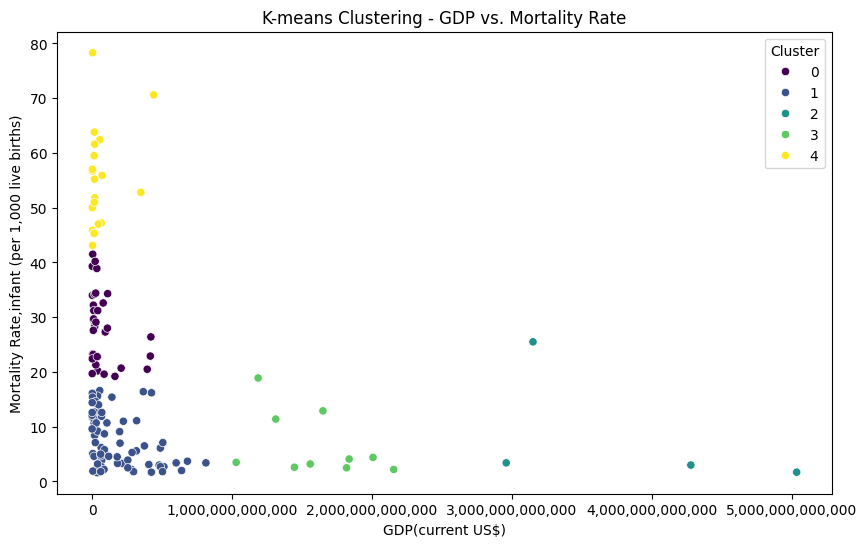

In [ ]:
#same as previous but outliers example
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

selected_features = ['GDP', 'Mortality Rate']
gdp_vs_mr_df = cleaned_df[selected_features].copy()

#identify and exclude the top 3 outliers based on GDP
top_outliers_indices = gdp_vs_mr_df['GDP'].nlargest(3).index
gdp_vs_mr_df = gdp_vs_mr_df[~gdp_vs_mr_df.index.isin(top_outliers_indices)]

scaler = StandardScaler()
gdp_vs_mr_df_scaled = scaler.fit_transform(gdp_vs_mr_df)

#elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gdp_vs_mr_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
gdp_vs_mr_df['Cluster'] = kmeans.fit_predict(gdp_vs_mr_df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Mortality Rate', hue='Cluster', data=gdp_vs_mr_df, palette='viridis')

plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.title('K-means Clustering - GDP vs. Mortality Rate')
plt.xlabel('GDP(current US$)')
plt.ylabel('Mortality Rate,infant (per 1,000 live births)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

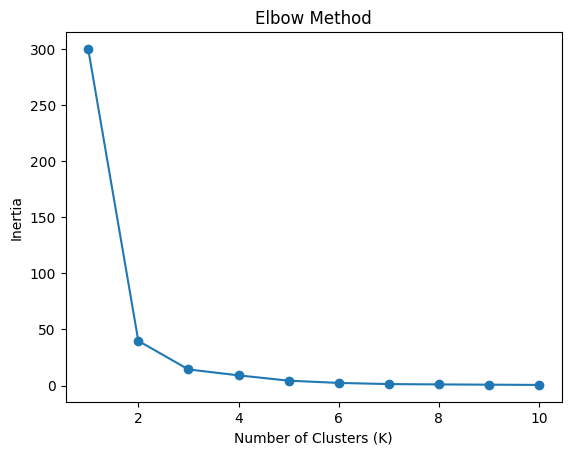

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['China', 'India'], dtype='object', name='Country Name')


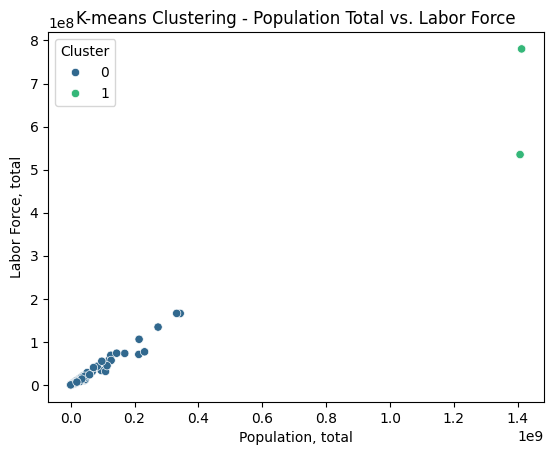

In [ ]:
#population vs labor force! same code idea just switching attributes
selected_features = ['Population Total', 'Labor Force']
pop_vs_lf_df = cleaned_df[selected_features].copy()

pop_vs_lf_df_scaled = pop_vs_lf_df.copy()

scaler = StandardScaler()
pop_vs_lf_df_scaled = scaler.fit_transform(pop_vs_lf_df_scaled)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pop_vs_lf_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# k = 2
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pop_vs_lf_df['Cluster'] = kmeans.fit_predict(pop_vs_lf_df_scaled)

top_outliers_indices = pop_vs_lf_df['Population Total'].nlargest(2).index
print(top_outliers_indices) #china and india are in cluster 1

sns.scatterplot(x='Population Total', y='Labor Force', hue='Cluster', data=pop_vs_lf_df, palette='viridis')
plt.title('K-means Clustering - Population Total vs. Labor Force')
plt.xlabel('Population, total')
plt.ylabel('Labor Force, total')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

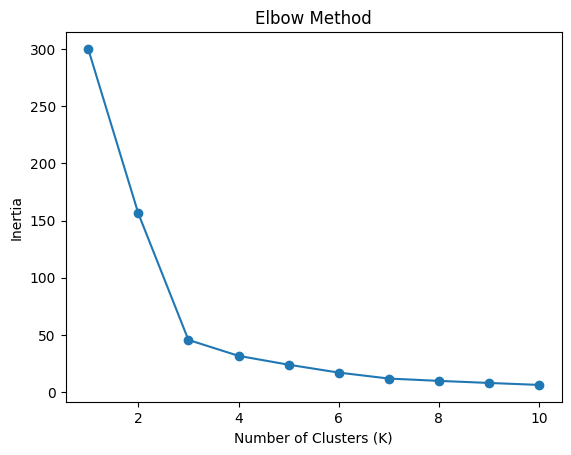

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


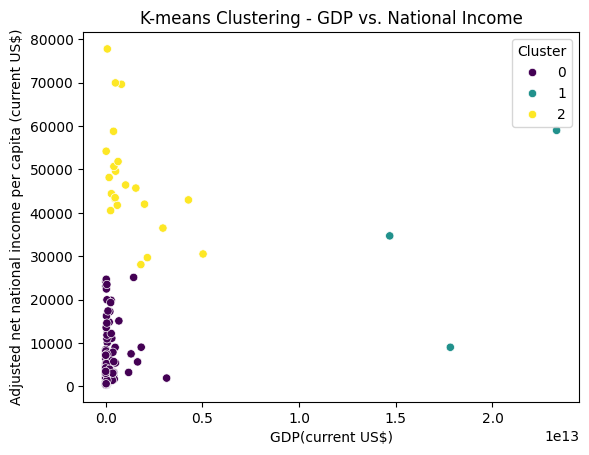

In [ ]:
#gdp and national income should be interesting as they both measure a country's economic wealth...
selected_features = ['GDP', 'National Income']
gdp_vs_ni_df = cleaned_df[selected_features].copy()

scaler = StandardScaler()
gdp_vs_ni_df_scaled = scaler.fit_transform(gdp_vs_ni_df)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(gdp_vs_ni_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
gdp_vs_ni_df['Cluster'] = kmeans.fit_predict(gdp_vs_ni_df_scaled)

sns.scatterplot(x='GDP', y='National Income', hue='Cluster', data=gdp_vs_ni_df, palette='viridis')
plt.title('K-means Clustering - GDP vs. National Income')
plt.xlabel('GDP(current US$)')
plt.ylabel('Adjusted net national income per capita (current US$)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

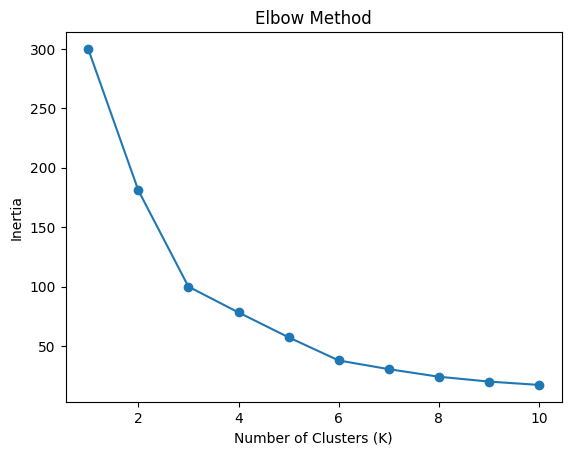

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['Pakistan', 'India'], dtype='object', name='Country Name')


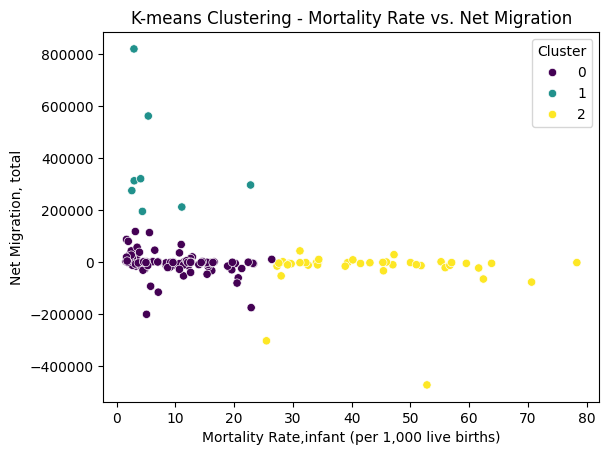

In [ ]:
#Net Migration and Moratlity Rate could show a relationship potentially of quality of life

selected_features = ['Mortality Rate', 'Net Migration']
mr_vs_nm_df = cleaned_df[selected_features].copy()

scaler = StandardScaler()
mr_vs_nm_df_scaled = scaler.fit_transform(mr_vs_nm_df)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mr_vs_nm_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mr_vs_nm_df['Cluster'] = kmeans.fit_predict(mr_vs_nm_df_scaled)

neg_outliers_indices = mr_vs_nm_df['Net Migration'].nsmallest(2).index
print(neg_outliers_indices) #cluster 2 - india and pakistan? interesting

sns.scatterplot(x='Mortality Rate', y='Net Migration', hue='Cluster', data=mr_vs_nm_df, palette='viridis')
plt.title('K-means Clustering - Mortality Rate vs. Net Migration')
plt.xlabel('Mortality Rate,infant (per 1,000 live births)')
plt.ylabel('Net Migration, total')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

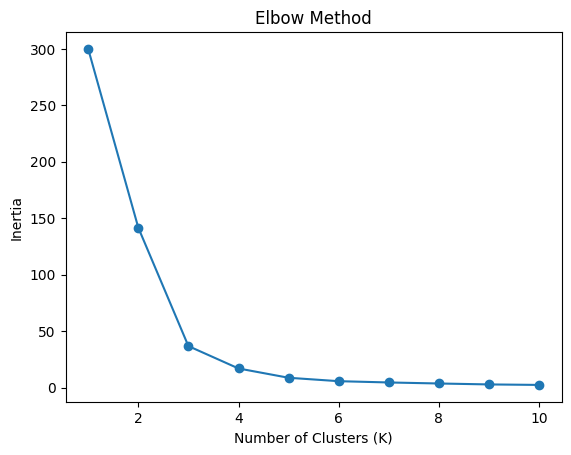

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['United States'], dtype='object', name='Country Name')


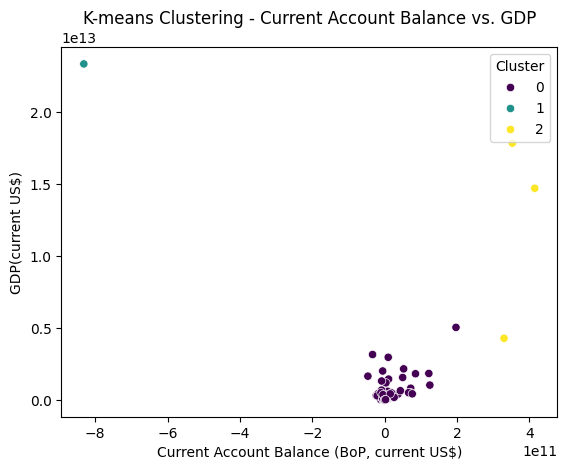

In [ ]:
#Current Account Balance and GDP .. interesting to see in general - thinking US high debt, high gdp
selected_features = ['Current Account Balance', 'GDP']
cab_vs_gdp_df = cleaned_df[selected_features].copy()

scaler = StandardScaler()
cab_vs_gdp_df_scaled = scaler.fit_transform(cab_vs_gdp_df)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cab_vs_gdp_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cab_vs_gdp_df['Cluster'] = kmeans.fit_predict(cab_vs_gdp_df_scaled)

neg_outliers_indices = cab_vs_gdp_df['Current Account Balance'].nsmallest(1).index
print(neg_outliers_indices) #united states lol

sns.scatterplot(x='Current Account Balance', y='GDP', hue='Cluster', data=cab_vs_gdp_df, palette='viridis')
plt.title('K-means Clustering - Current Account Balance vs. GDP')
plt.xlabel('Current Account Balance (BoP, current US$)')
plt.ylabel('GDP(current US$)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

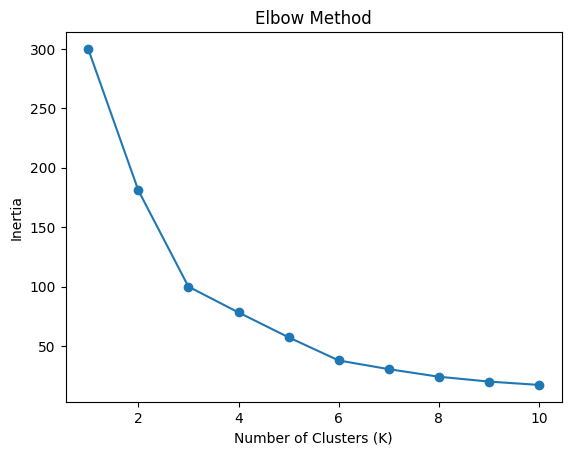

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Index(['Pakistan', 'India'], dtype='object', name='Country Name')


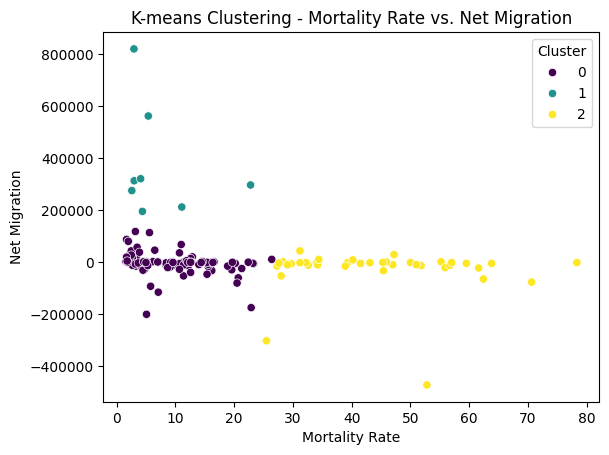

In [ ]:
#Net Migration and Moratlity Rate could show a relationship potentially of quality of life
selected_features = ['Mortality Rate', 'Net Migration']
mr_vs_nm_df = cleaned_df[selected_features].copy()

scaler = StandardScaler()
mr_vs_nm_df_scaled = scaler.fit_transform(mr_vs_nm_df)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mr_vs_nm_df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mr_vs_nm_df['Cluster'] = kmeans.fit_predict(mr_vs_nm_df_scaled)

neg_outliers_indices = mr_vs_nm_df['Net Migration'].nsmallest(2).index
print(neg_outliers_indices) #cluster 2 - india and pakistan? interesting

sns.scatterplot(x='Mortality Rate', y='Net Migration', hue='Cluster', data=mr_vs_nm_df, palette='viridis')
plt.title('K-means Clustering - Mortality Rate vs. Net Migration')
plt.xlabel('Mortality Rate')
plt.ylabel('Net Migration')
plt.show()

DBSCAN Clustering Algorithm, summer

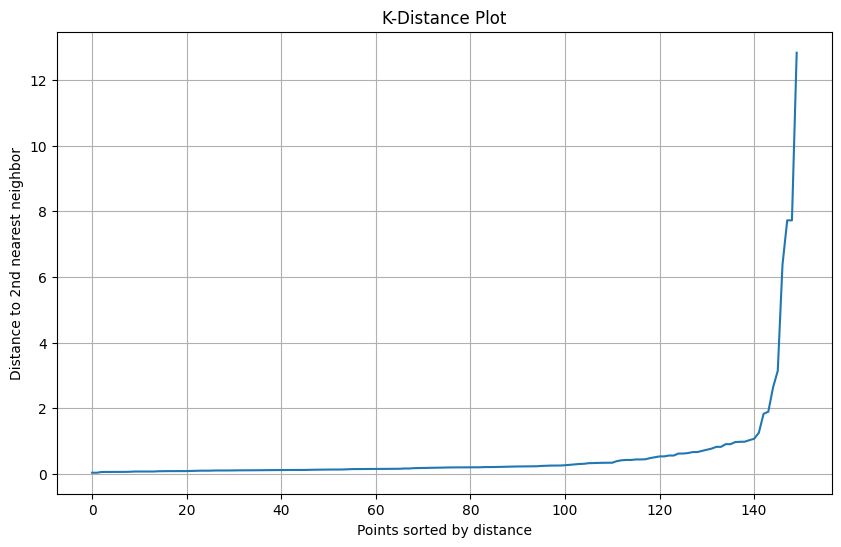

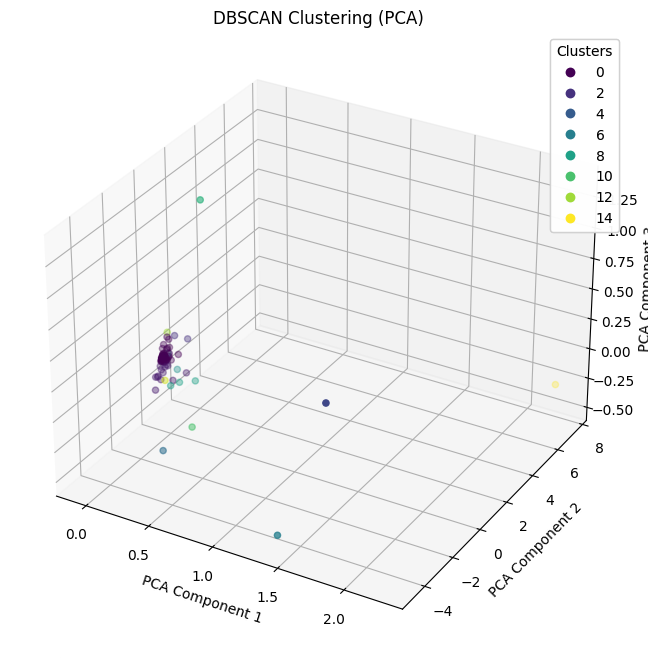

In [ ]:
#DBSCAN WITH ALL FEATURES TO FIND PATTERNS !
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Create a 3D scatter plot of the clusters
from mpl_toolkits.mplot3d import Axes3D

dbscan_df = cleaned_df.copy()#easier to work w copy and not modify original

numerical_attributes = ['GDP', 'Population Total', 'National Income', 'Labor Force', 'Net Migration','Current Account Balance','Mortality Rate']

#scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dbscan_df[numerical_attributes])

#GETTING BEST EPSILON VALUE!
#calculate the k-distance plot to find a suitable eps value
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

#sort the distances for each point
distances = np.sort(distances, axis=0)
distances = distances[:,1]  # Consider the distance to the 2nd nearest neighbor

#plot the k-distance plot
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()   #based on k distance y axis , 1 seems to be elbow.... 5 also appears to be good tho when looking at data

#DBSCAN clustering algorithm, min samples can be 1 bc country can be uniquie in own cluster
dbscan = DBSCAN(eps=1, min_samples=1)

#fit DBSCAN to the scaled data
clusters = dbscan.fit_predict(scaled_data)

dbscan_df['cluster_label'] = clusters

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
pca_data = pca.fit_transform(dbscan_df[numerical_attributes])


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=dbscan_df['cluster_label'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

ax.set_title('DBSCAN Clustering (PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2') # but what does this mean?
ax.set_zlabel('PCA Component 3')

plt.show()



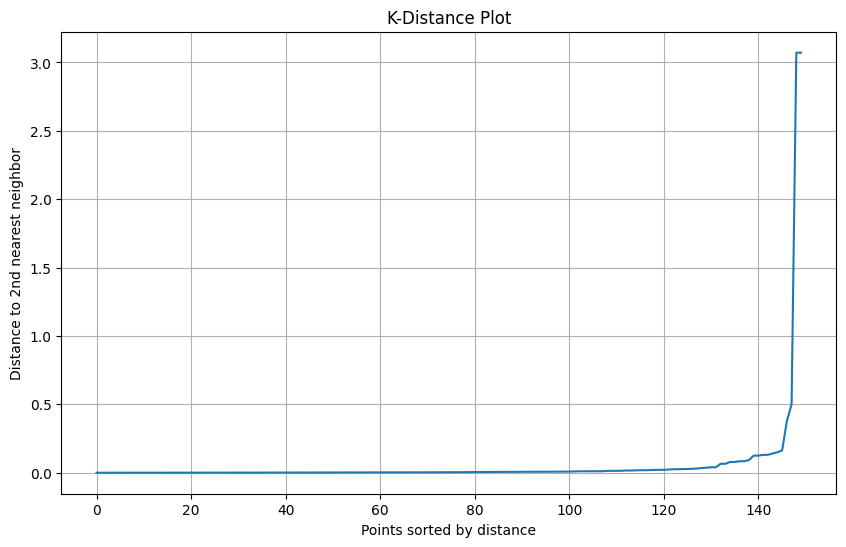

                           GDP  Population Total  National Income  Labor Force  Net Migration  \
Country Name                                                                                    
Australia    1559033756285.130      25685412.000        45710.890 13806208.000     117929.000   
Austria       479295362747.047       8955797.000        43281.733  4688653.000      20314.000   
Belgium       600748812601.541      11586195.000        41743.014  5259744.000      52356.000   
Canada       2007472181464.150      38226498.000        42000.913 20960467.000     195181.000   
Switzerland   813408787222.499       8704546.000        69631.658  4981500.000      23872.000   
Denmark       405687998852.691       5856733.000        58796.360  3070703.000      22746.000   
Finland       296470417085.267       5541017.000        44416.200  2799859.000      14928.000   
Ireland       513391778882.860       5033164.000        49607.175  2551560.000      15320.000   
Iceland        25595940169.588

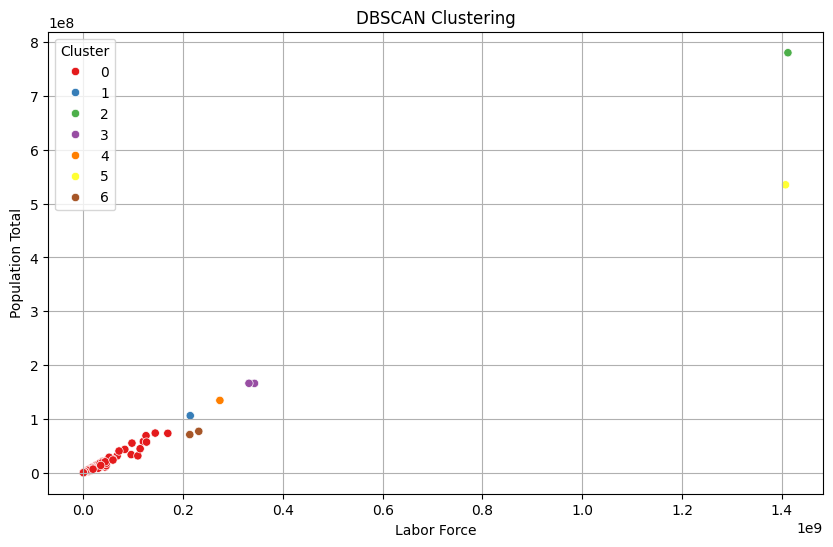

In [ ]:
#visualizing w labor and pop-dbscan !

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

#want just to scale these together
pop_lf_attributes = ['Population Total','Labor Force']

#scaling
scaler = StandardScaler()
scaled_data2 = scaler.fit_transform(dbscan_df[pop_lf_attributes])

#EPS VALUE
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data2)
distances2, indices2 = nbrs.kneighbors(scaled_data2)
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
#plot k distance to get best eps value
plt.figure(figsize=(10, 6))
plt.plot(distances2)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()

#DBSCAN clustering algorithm, based on clustering plot we use .25 ... however if we did use 5 it would match other k-means plot
dbscan = DBSCAN(eps=.25, min_samples=1)

#fit DBSCAN to the scaled data
clusters = dbscan.fit_predict(scaled_data2)

#for writing purposes want to know which countries are in what cluster etc
cluster_1_countries = dbscan_df[dbscan_df['cluster_label'] == 1]
print(cluster_1_countries)
cluster_2_countries = dbscan_df[dbscan_df['cluster_label'] == 2]
print(cluster_2_countries)
cluster_3_countries = dbscan_df[dbscan_df['cluster_label'] == 3]
print(cluster_3_countries)
cluster_4_countries = dbscan_df[dbscan_df['cluster_label'] == 4]
print(cluster_4_countries)
cluster_5_countries = dbscan_df[dbscan_df['cluster_label'] == 5]
print(cluster_5_countries)
cluster_6_countries = dbscan_df[dbscan_df['cluster_label'] == 6]
print(cluster_6_countries)

dbscan_df['cluster_label'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Total', y='Labor Force', hue='cluster_label', data=dbscan_df, palette='Set1', legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Labor Force')
plt.ylabel('Population Total')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

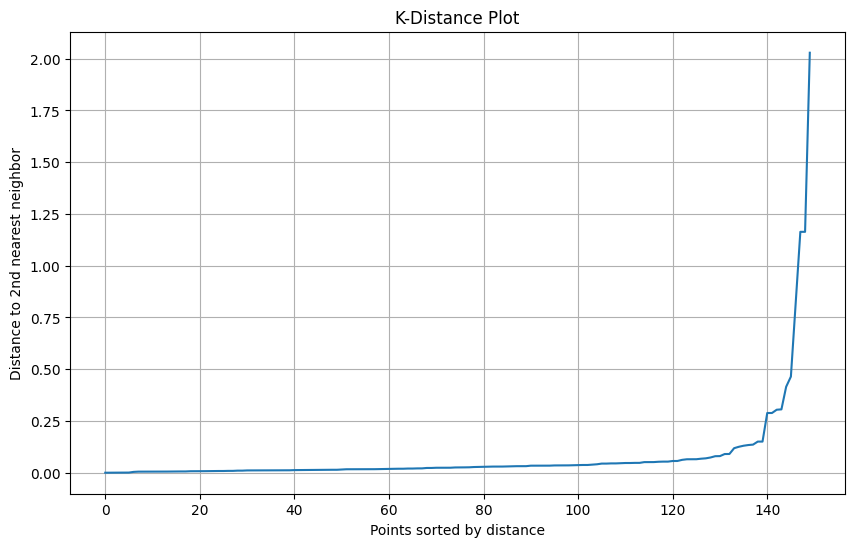

                          GDP  Population Total  National Income  Labor Force  Net Migration  \
Country Name                                                                                   
Nigeria      440838992188.478     213401323.000         1702.482 70911721.000     -76364.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
Nigeria               -3254163170.283          70.600             12  
                        GDP  Population Total  National Income  Labor Force  Net Migration  \
Country Name                                                                                 
Sierra Leone 4249234704.019       8420641.000          409.685  2717703.000      -1544.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
Sierra Leone           -358390214.393          78.300             13  
  

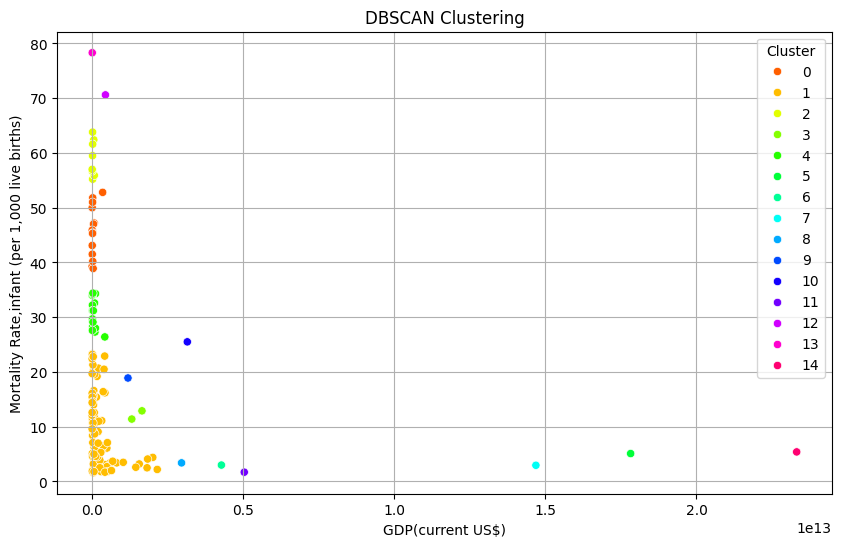

In [ ]:
#visualizing w gdp and mortality rate-dbscan !

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

#want just to scale these together
gdp_mr_attributes = ['GDP','Mortality Rate']

#scaling
scaler = StandardScaler()
scaled_data3 = scaler.fit_transform(dbscan_df[gdp_mr_attributes])

#EPS VALUE
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data3)
distances3, indices3 = nbrs.kneighbors(scaled_data3)
distances3 = np.sort(distances3, axis=0)
distances3 = distances3[:,1]
#plot k distance to get best eps value
plt.figure(figsize=(10, 6))
plt.plot(distances3)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=.17, min_samples=1)

clusters = dbscan.fit_predict(scaled_data3)

palette = sns.color_palette('hsv', len(np.unique(clusters))) #issue with clusters repeating colors so have to fix here ! with unique colors

dbscan_df['cluster_label'] = clusters

cluster_12_countries = dbscan_df[dbscan_df['cluster_label'] == 12]
print(cluster_12_countries)
cluster_13_countries = dbscan_df[dbscan_df['cluster_label'] == 13]
print(cluster_13_countries)
cluster_14_countries = dbscan_df[dbscan_df['cluster_label'] == 14]
print(cluster_14_countries)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Mortality Rate', hue='cluster_label', data=dbscan_df, palette=palette, legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('GDP(current US$)')
plt.ylabel('Mortality Rate,infant (per 1,000 live births)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

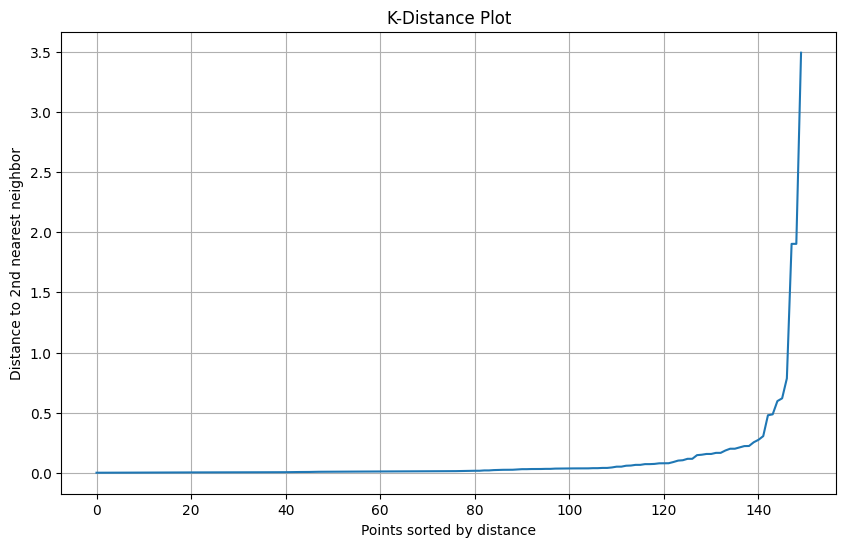

                            GDP  Population Total  National Income   Labor Force  Net Migration  \
Country Name                                                                                      
China        17820459508852.199    1412360000.000         9015.348 780370660.000    -200194.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
China                352885754634.630           5.100              3  
                           GDP  Population Total  National Income  Labor Force  Net Migration  \
Country Name                                                                                    
Germany      4278503934689.850      83196078.000        42982.482 43386527.000     312735.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
Germany              329969047797.258           3.000  

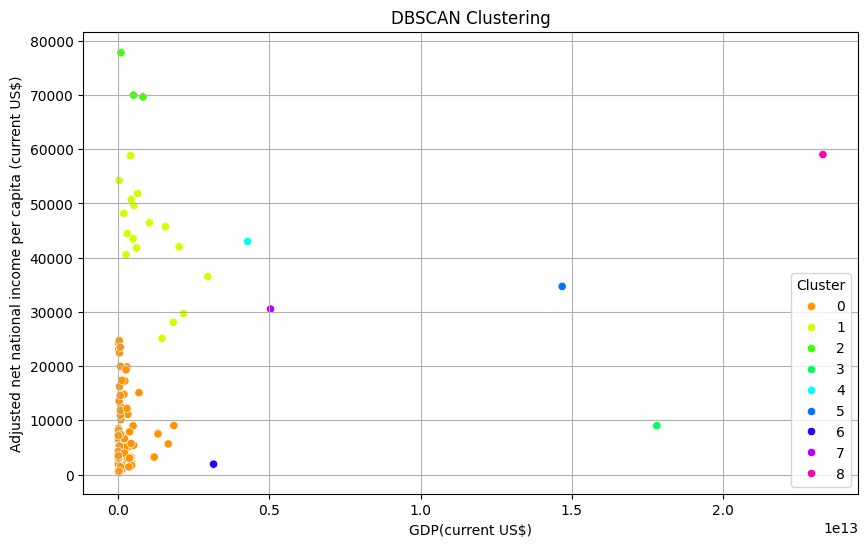

In [ ]:
#visualizing w gdp and national income-dbscan !

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

#want just to scale these together
gdp_ni_attributes = ['GDP','National Income']

#scaling
scaler = StandardScaler()
scaled_data4 = scaler.fit_transform(dbscan_df[gdp_ni_attributes])

#EPS VALUE
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data4)
distances4, indices4 = nbrs.kneighbors(scaled_data4)
distances4 = np.sort(distances4, axis=0)
distances4 = distances4[:,1]
#plot k distance to get best eps value
plt.figure(figsize=(10, 6))
plt.plot(distances4)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()

#DBSCAN clustering algorithm
dbscan = DBSCAN(eps=.5, min_samples=1)

#fit DBSCAN to the scaled data
clusters = dbscan.fit_predict(scaled_data4)

palette = sns.color_palette('hsv', len(np.unique(clusters))) #keeping this from now on bc pretty colors haha

dbscan_df['cluster_label'] = clusters

cluster_3_countries = dbscan_df[dbscan_df['cluster_label'] == 3]
print(cluster_3_countries)
cluster_4_countries = dbscan_df[dbscan_df['cluster_label'] == 4]
print(cluster_4_countries)
cluster_5_countries = dbscan_df[dbscan_df['cluster_label'] == 5]
print(cluster_5_countries)
cluster_6_countries = dbscan_df[dbscan_df['cluster_label'] == 6]
print(cluster_6_countries)
cluster_7_countries = dbscan_df[dbscan_df['cluster_label'] == 7]
print(cluster_7_countries)
cluster_8_countries = dbscan_df[dbscan_df['cluster_label'] == 8]
print(cluster_8_countries)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='National Income', hue='cluster_label', data=dbscan_df, palette=palette, legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('GDP(current US$)')
plt.ylabel('Adjusted net national income per capita (current US$)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

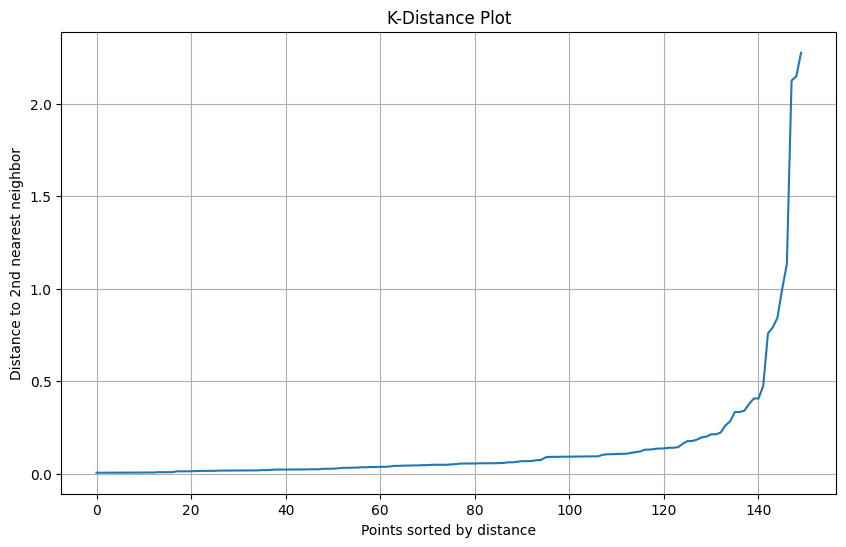

                          GDP  Population Total  National Income  Labor Force  Net Migration  \
Country Name                                                                                   
Nigeria      440838992188.478     213401323.000         1702.482 70911721.000     -76364.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
Nigeria               -3254163170.283          70.600              9  
                            GDP  Population Total  National Income   Labor Force  Net Migration  \
Country Name                                                                                      
Euro area    14685655202079.000     343063979.000        34691.773 166041206.000     819231.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
Euro area            414807967171.572           2.961     

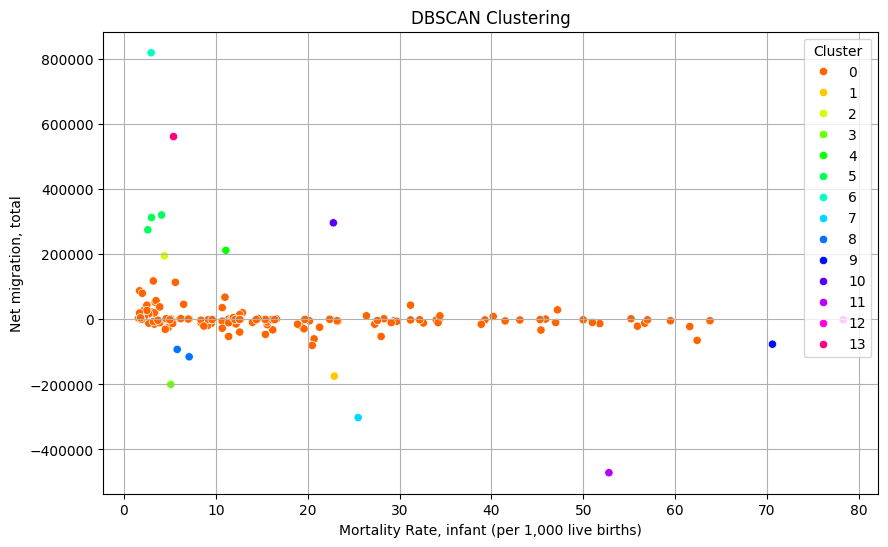

In [ ]:
#visualizing w mortality rate and net migration: dbscan !
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

#want just to scale these together
mr_nm_attributes = ['Mortality Rate','Net Migration']

#scaling
scaler = StandardScaler()
scaled_data5 = scaler.fit_transform(dbscan_df[mr_nm_attributes])

#EPS VALUE
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data5)
distances5, indices5 = nbrs.kneighbors(scaled_data5)
distances5 = np.sort(distances5, axis=0)
distances5 = distances5[:,1]
#plot k distance to get best eps value
plt.figure(figsize=(10, 6))
plt.plot(distances5)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=.4, min_samples=1)

#fit DBSCAN to the scaled data
clusters = dbscan.fit_predict(scaled_data5)

palette = sns.color_palette('hsv', len(np.unique(clusters)))

dbscan_df['cluster_label'] = clusters

cluster_9_countries = dbscan_df[dbscan_df['cluster_label'] == 9]
print(cluster_9_countries)
cluster_6_countries = dbscan_df[dbscan_df['cluster_label'] == 6]
print(cluster_6_countries)
cluster_11_countries = dbscan_df[dbscan_df['cluster_label'] == 11]
print(cluster_11_countries)
cluster_13_countries = dbscan_df[dbscan_df['cluster_label'] == 13]
print(cluster_13_countries)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mortality Rate', y='Net Migration', hue='cluster_label', data=dbscan_df, palette=palette, legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Mortality Rate, infant (per 1,000 live births)')
plt.ylabel('Net migration, total')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

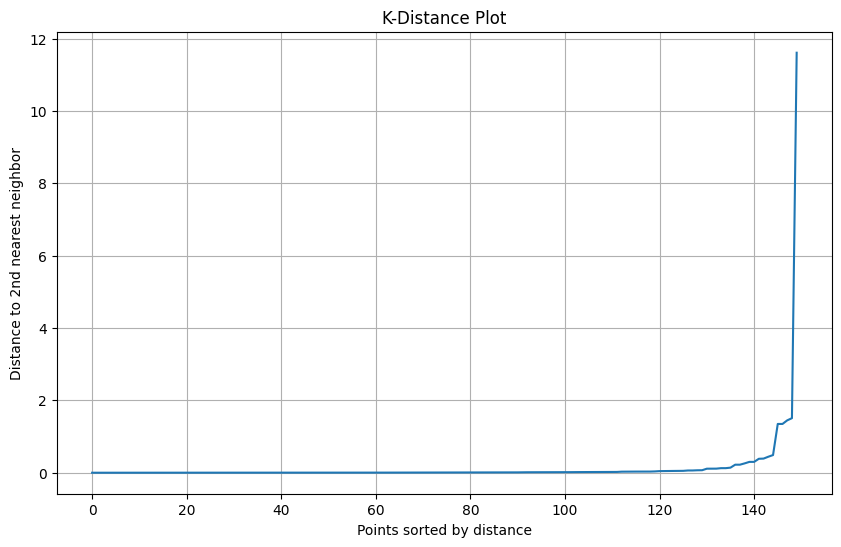

                            GDP  Population Total  National Income   Labor Force  Net Migration  \
Country Name                                                                                      
China        17820459508852.199    1412360000.000         9015.348 780370660.000    -200194.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
China                352885754634.630           5.100              1  
                           GDP  Population Total  National Income  Labor Force  Net Migration  \
Country Name                                                                                    
Germany      4278503934689.850      83196078.000        42982.482 43386527.000     312735.000   

              Current Account Balance  Mortality Rate  cluster_label  
Country Name                                                          
Germany              329969047797.258           3.000  

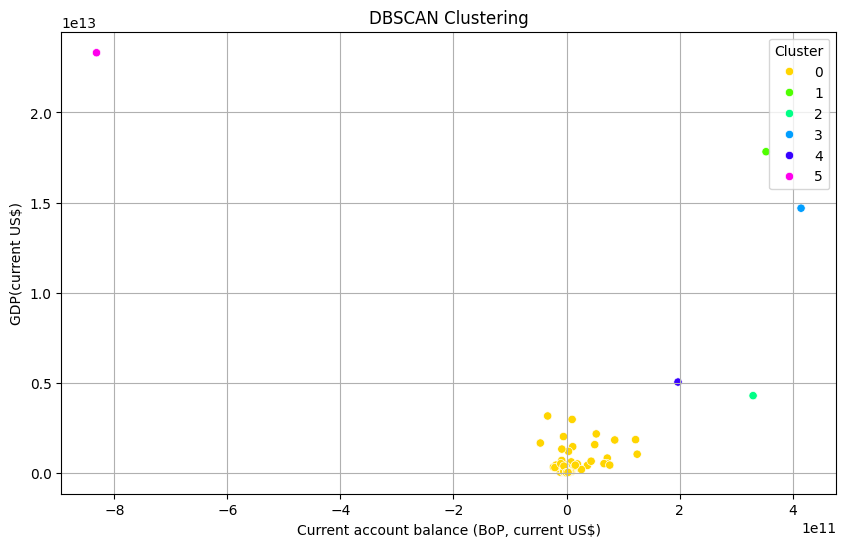

In [ ]:
#current acc bal and gdp dbscan
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

#want just to scale these together
cab_gdp_attributes = ['Current Account Balance','GDP']

#scaling
scaler = StandardScaler()
scaled_data6 = scaler.fit_transform(dbscan_df[cab_gdp_attributes])

#EPS VALUE
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(scaled_data6)
distances6, indices6 = nbrs.kneighbors(scaled_data6)
distances6 = np.sort(distances6, axis=0)
distances6 = distances6[:,1]
#plot k distance to get best eps value
plt.figure(figsize=(10, 6))
plt.plot(distances6)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 2nd nearest neighbor')
plt.title('K-Distance Plot')
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=.5, min_samples=1)

#fit DBSCAN to the scaled data
clusters = dbscan.fit_predict(scaled_data6)

palette = sns.color_palette('hsv', len(np.unique(clusters)))

dbscan_df['cluster_label'] = clusters

cluster_1_countries = dbscan_df[dbscan_df['cluster_label'] == 1]
print(cluster_1_countries)
cluster_2_countries = dbscan_df[dbscan_df['cluster_label'] == 2]
print(cluster_2_countries)
cluster_3_countries = dbscan_df[dbscan_df['cluster_label'] == 3]
print(cluster_3_countries)
cluster_4_countries = dbscan_df[dbscan_df['cluster_label'] == 4]
print(cluster_4_countries)
cluster_5_countries = dbscan_df[dbscan_df['cluster_label'] == 5]
print(cluster_5_countries)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Current Account Balance', y='GDP', hue='cluster_label', data=dbscan_df, palette=palette, legend='full')
plt.title('DBSCAN Clustering')
plt.xlabel('Current account balance (BoP, current US$)')
plt.ylabel('GDP(current US$)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Major's Section

## Loading the Data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_paths = [
    '/content/drive/MyDrive/GlobalData/gdp.csv',
    '/content/drive/MyDrive/GlobalData/currentaccbal.csv',
    '/content/drive/MyDrive/GlobalData/mortalityrate.csv',
    '/content/drive/MyDrive/GlobalData/netmigration.csv',
    '/content/drive/MyDrive/GlobalData/nationalincome.csv',
    '/content/drive/MyDrive/GlobalData/laborforce.csv',
    '/content/drive/MyDrive/GlobalData/populationtotal.csv'
]

# Initialize an empty dictionary
cleaned_dataframes = {}

# Loop through each file, perform the cleaning steps, and store the cleaned dataframe
for file_path in file_paths:
    # Get file name
    file_name = file_path.split('/')[-1].replace('.csv', '')

    # Load the CSV file
    df = pd.read_csv(file_path, skiprows=3)

    # Remove the columns for the years 1960 to 2020 and also 2022
    df_cleaned = df.drop(columns=[str(year) for year in range(1960, 2021)] + ['2022', 'Unnamed: 67'], errors='ignore')

    # Remove missing rows
    df_cleaned_final = df_cleaned.dropna(subset=['2021'])

    # Store the cleaned dataframe in the dictionary
    cleaned_dataframes[file_name] = df_cleaned_final

In [ ]:
# Dictionary to store the updated dataframes
updated_dfs = {}

for indicator, dataframe in cleaned_dataframes.items():
    df = dataframe.copy()
    # Update 2021 column name
    indicator_name = df['Indicator Name'].iloc[0]
    df.rename(columns={'2021': indicator_name}, inplace=True)

    # Remove unnecessary columns
    df.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)

    # Store the updated dataframe
    updated_dfs[indicator] = df

updated_dfs

{'gdp':                                           Country Name Country Code  GDP (current US$)
 0                                                Aruba          ABW     3103184101.514
 1                          Africa Eastern and Southern          AFE  1086530704900.500
 2                                          Afghanistan          AFG    14266499429.875
 3                           Africa Western and Central          AFW   844927536437.833
 4                                               Angola          AGO    66505129989.243
 5                                              Albania          ALB    17930565118.818
 6                                              Andorra          AND     3325143693.287
 7                                           Arab World          ARB  2930480380718.330
 8                                 United Arab Emirates          ARE   415178792769.884
 9                                            Argentina          ARG   487902572164.348
 10                      

In [ ]:
dfs = list(updated_dfs.values())

# Combine all country names and codes
all_countries_df = pd.concat([df[['Country Name', 'Country Code']] for df in dfs]).drop_duplicates()

# Convert the dataframe to a dictionary
country_dict = dict(zip(all_countries_df['Country Name'], all_countries_df['Country Code']))

# Merge time!
from functools import reduce

dfs_to_merge = [df.set_index('Country Name').drop('Country Code', axis=1) for df in dfs]

# Merging
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Country Name', how='outer'), dfs_to_merge).reset_index()

merged_df.head(), len(country_dict), merged_df.shape

(                  Country Name  GDP (current US$)  Current account balance (BoP, current US$)  \
 0                        Aruba     3103184101.514                                79257066.708   
 1  Africa Eastern and Southern  1086530704900.500                                         NaN   
 2                  Afghanistan    14266499429.875                                         NaN   
 3   Africa Western and Central   844927536437.833                                         NaN   
 4                       Angola    66505129989.243                              8399451648.833   
 
    Mortality rate, infant (per 1,000 live births)  Net migration  \
 0                                             NaN        501.000   
 1                                          42.004    -179444.000   
 2                                          43.400    -183672.000   
 3                                          60.750    -264802.000   
 4                                          47.200      29089.000

In [ ]:
# Remove rows where any field is missing data
cleaned_df = merged_df.dropna()

cleaned_df.shape

(150, 8)

## Birch Algorithm

In [ ]:
import pandas as pd

# Load the dataset
data = cleaned_df.copy()

# Display head
data.head()

,Country Name,GDP (current US$),"Current account balance (BoP, current US$)","Mortality rate, infant (per 1,000 live births)",Net migration,Adjusted net national income per capita (current US$),"Labor force, total","Population, total"
4,Angola,66505129989.243,8399451648.833,47.200,29089.000,1232.948,14445598.000,34503774.000
5,Albania,17930565118.818,-1369694859.413,8.400,-10612.000,5262.914,1382433.000,2811666.000
9,Argentina,487902572164.348,6644503789.249,6.100,2344.000,8993.547,21191985.000,45808747.000
10,Armenia,13878908628.938,-482982405.936,9.500,-12825.000,4023.251,1393091.000,2790974.000
13,Australia,1559033756285.130,49877857681.790,3.200,117929.000,45710.890,13806208.000,25685412.000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

def prepare_and_plot(data, x_col, y_col, title, xlabel, ylabel):
    # Select and scale the columns
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[[x_col, y_col]])

    # Perform BIRCH
    birch_model = Birch(n_clusters=8)
    birch_model.fit(scaled_features)

    # Predicting clusters
    clusters = birch_model.predict(scaled_features)

    # Creating a DataFrame
    plot_data = pd.DataFrame(scaled_features, columns=[x_col, y_col])
    plot_data['Cluster'] = clusters
    plot_data['Country Name'] = data['Country Name'] # Add country names

    # Plotting
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=plot_data, x=x_col, y=y_col, hue='Cluster', palette='viridis', legend="full")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


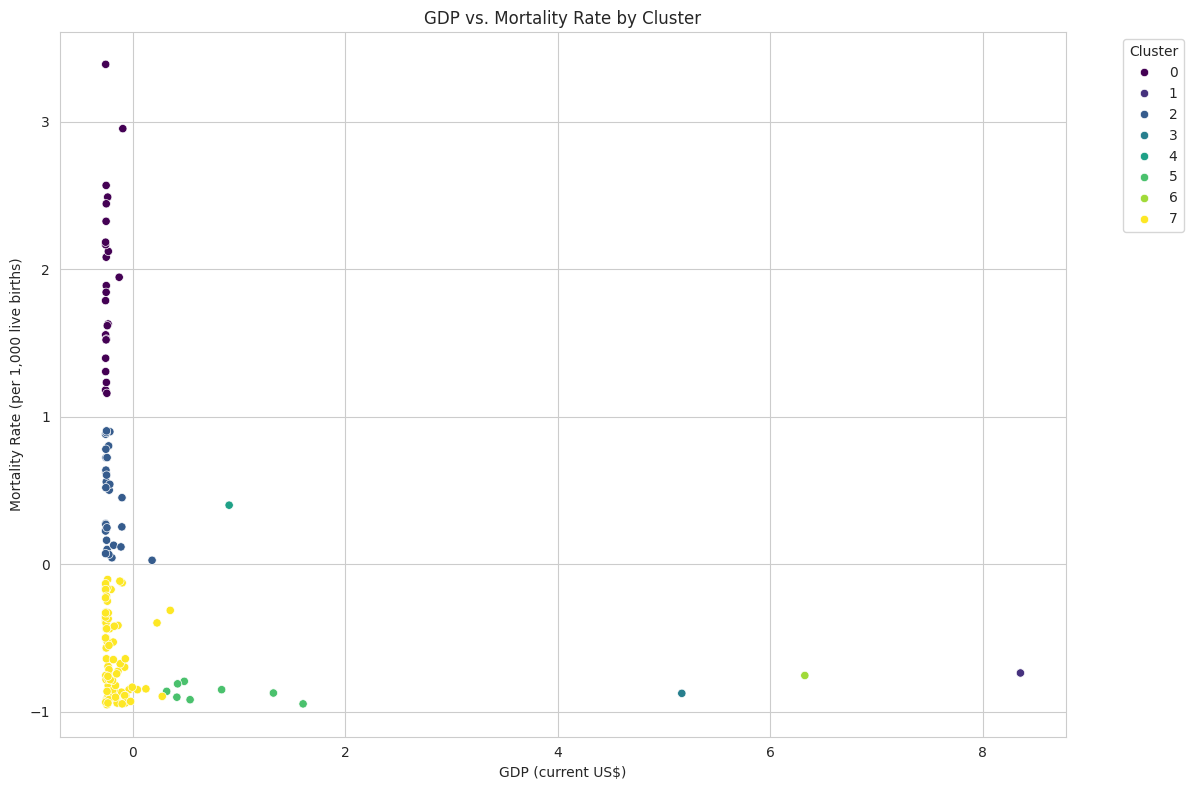

In [ ]:
# Plot for GDP vs. Mortality Rate
prepare_and_plot(data, 'GDP (current US$)', 'Mortality rate, infant (per 1,000 live births)',
                 'GDP vs. Mortality Rate by Cluster', 'GDP (current US$)', 'Mortality Rate (per 1,000 live births)')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (5) by BIRCH is less than (8). Decrease the threshold.
  warnings.warn(


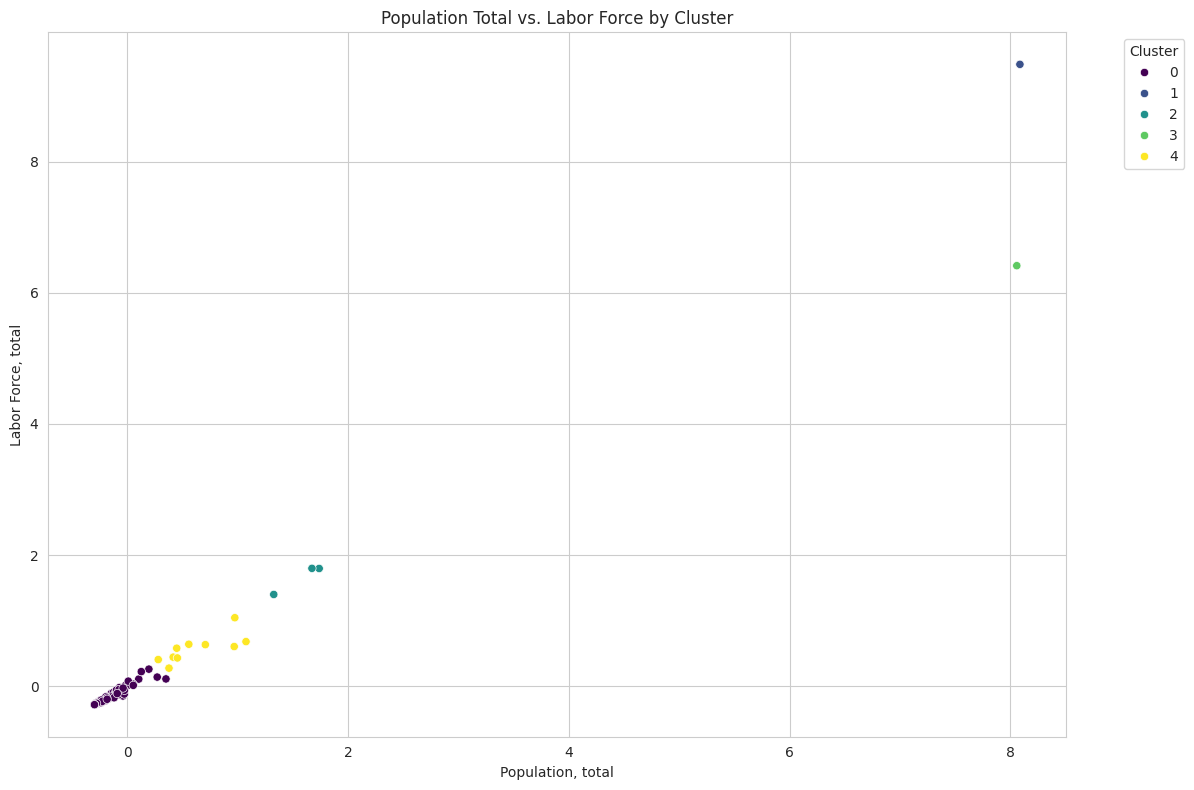

In [ ]:
# Plot for Population Total vs. Labor Force
prepare_and_plot(data, 'Population, total', 'Labor force, total',
                 'Population Total vs. Labor Force by Cluster', 'Population, total', 'Labor Force, total')

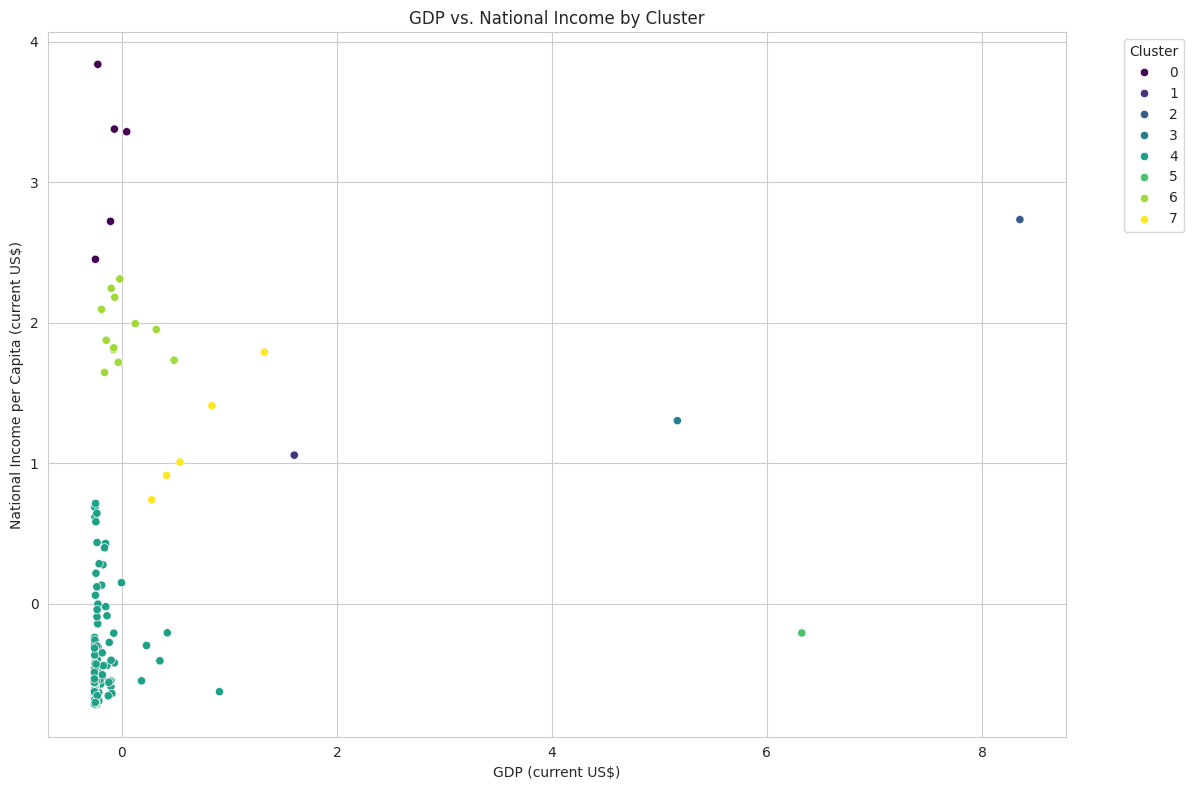

In [ ]:
# Plot for GDP vs. National Income
prepare_and_plot(data, 'GDP (current US$)', 'Adjusted net national income per capita (current US$)',
                 'GDP vs. National Income by Cluster', 'GDP (current US$)', 'National Income per Capita (current US$)')

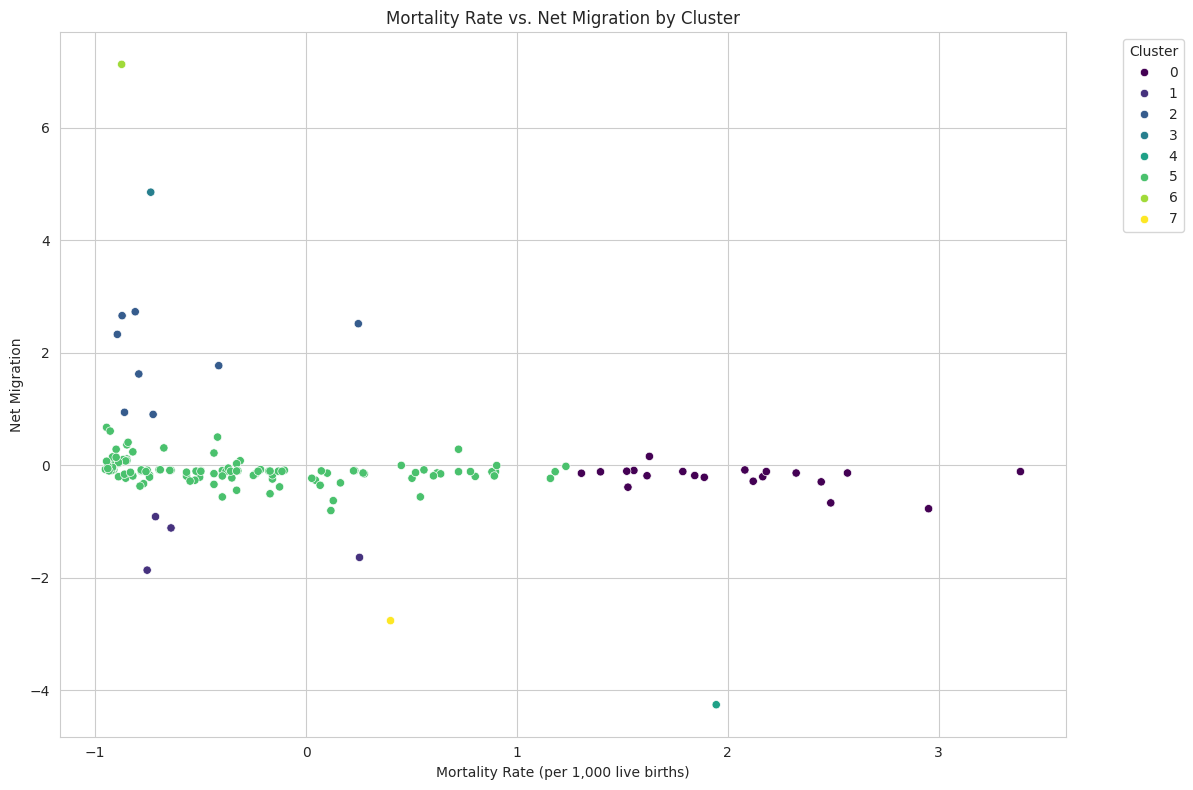

In [ ]:
# Plot for Mortality Rate vs. Net Migration
prepare_and_plot(data, 'Mortality rate, infant (per 1,000 live births)', 'Net migration',
                 'Mortality Rate vs. Net Migration by Cluster', 'Mortality Rate (per 1,000 live births)', 'Net Migration')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_birch.py:726: ConvergenceWarning: Number of subclusters found (6) by BIRCH is less than (8). Decrease the threshold.
  warnings.warn(


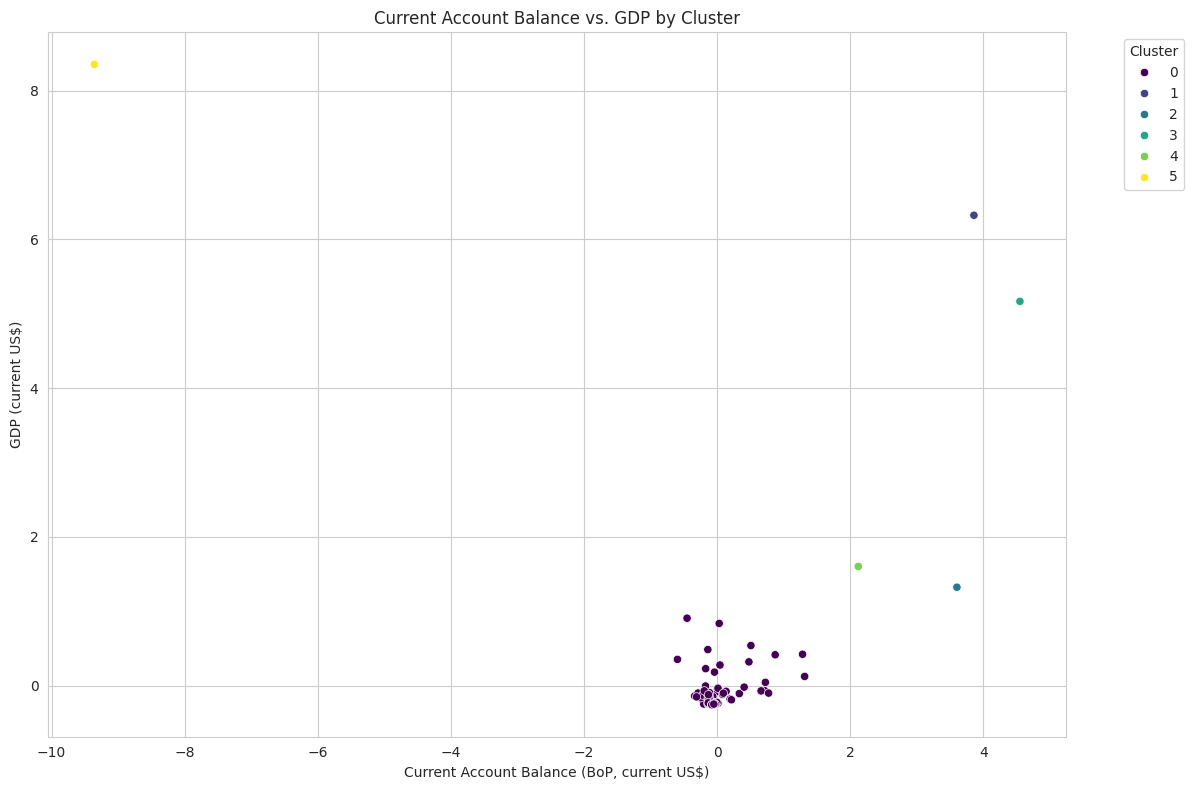

In [ ]:
# Plot for Current Account Balance vs. GDP
prepare_and_plot(data, 'Current account balance (BoP, current US$)', 'GDP (current US$)',
                 'Current Account Balance vs. GDP by Cluster', 'Current Account Balance (BoP, current US$)', 'GDP (current US$)')

## PCA Algorithm

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dropping the 'Country Name' column for PCA
data_pca = data.drop('Country Name', axis=1)

# Normalizing the data before PCA
scaler = StandardScaler()
data_normalized_pca = scaler.fit_transform(data_pca)

# Applying PCA to reduce dimensions to 2 for visualization purposes
pca = PCA(n_components=2)
data_pca_transformed = pca.fit_transform(data_normalized_pca)

# Overview of the PCA components
pca_data = pd.DataFrame(data_pca_transformed, columns=['PCA1', 'PCA2'])

pca_data.head()

,PCA1,PCA2
0,-0.575,1.059
1,-0.463,-0.069
2,-0.004,-0.187
3,-0.488,0.012
4,0.682,-2.073


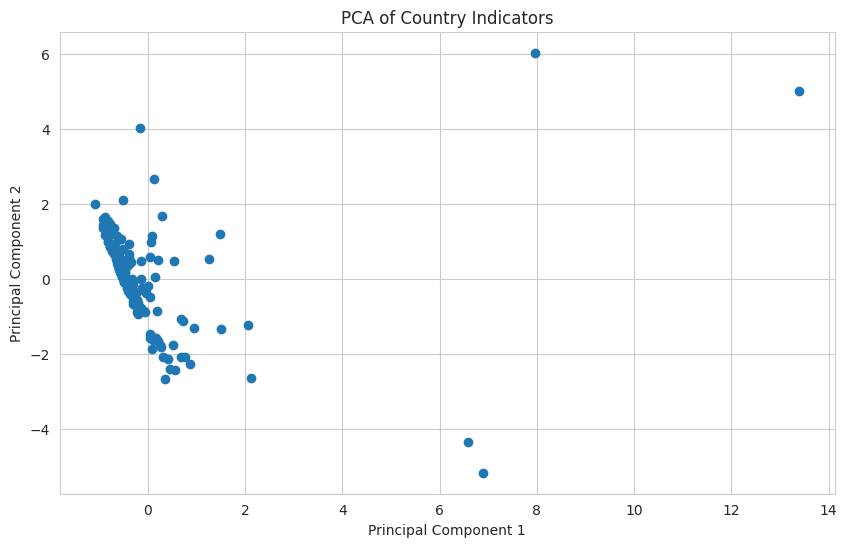

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data['PCA1'], pca_data['PCA2'])
plt.title('PCA of Country Indicators')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
# Identifying outliers in the PCA data
from scipy.stats import zscore

# Calculate the z-score of each point
pca_data['zscore_PCA1'] = zscore(pca_data['PCA1'])
pca_data['zscore_PCA2'] = zscore(pca_data['PCA2'])

# Define outliers as those with a z-score absolute value greater than 3
outliers = pca_data[(abs(pca_data['zscore_PCA1']) > 3) | (abs(pca_data['zscore_PCA2']) > 3)]

outliers

,PCA1,PCA2,zscore_PCA1,zscore_PCA2
24,13.398,5.012,8.355,3.658
41,6.583,-4.336,4.105,-3.164
61,7.964,6.034,4.966,4.404
142,6.898,-5.168,4.302,-3.772


In [ ]:
# Adding the country names back to the pca_data
pca_data_with_countries = pca_data.copy()
pca_data_with_countries['Country Name'] = data['Country Name']

# Identifying the countries corresponding to the outliers
outlier_countries = pca_data_with_countries.loc[outliers.index, ['Country Name', 'PCA1', 'PCA2']]

outlier_countries

,Country Name,PCA1,PCA2
24,Bosnia and Herzegovina,13.398,5.012
41,Cote d'Ivoire,6.583,-4.336
61,NaN,7.964,6.034
142,NaN,6.898,-5.168
